# CIFAR-10 Classification with PyTorch

In [ ]:
!pip install torchviz

100%|██████████| 170M/170M [00:16<00:00, 10.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


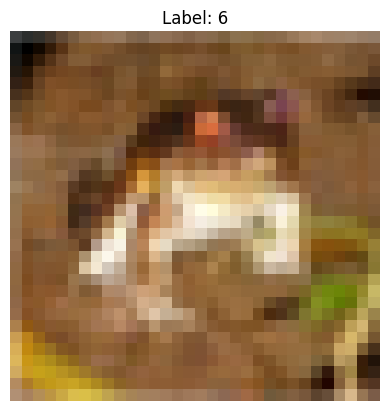

In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Step 2: Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

# Step 3: Visualize an example image
def visualize_example(dataset):
    img, label = dataset[0]
    img = img.permute(1, 2, 0).numpy()  # Rearrange dimensions for visualization
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()

visualize_example(train_dataset)

In [ ]:
num_train_examples = len(train_dataset)

num_test_examples = len(test_dataset)

image_size = (32, 32, 3)

train_x_shape = (num_train_examples, *image_size)
train_y_shape = (num_train_examples )
test_x_shape = (num_test_examples, *image_size)
test_y_shape = (num_test_examples )

print(f"Number of training examples: {num_train_examples}")
print(f"Number of testing examples: {num_test_examples}")
print(f"Each image is of size: {image_size}")
print(f"Shape of train_x: {train_x_shape}")
print(f"Shape of train_y: {train_y_shape}")
print(f"Shape of test_x: {test_x_shape}")
print(f"Shape of test_y: {test_y_shape}")

Number of training examples: 50000
Number of testing examples: 10000
Each image is of size: (32, 32, 3)
Shape of train_x: (50000, 32, 32, 3)
Shape of train_y: 50000
Shape of test_x: (10000, 32, 32, 3)
Shape of test_y: 10000


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class FullyConnectedNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FullyConnectedNN, self).__init__()
        # Define the layers
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, output_size) # Hidden to output layer

    def forward(self, x):
        # Define the forward pass
        x = x.view(-1, 3072)   # Flatten the input
        x = F.relu(self.fc1(x))  # Apply ReLU activation
        x = F.softmax(self.fc2(x), dim=1)  # Apply Softmax activation
        return x

class ConvolutionalNN(nn.Module):
    def __init__(self):
        super(ConvolutionalNN, self).__init__()
        # Define the layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # Define the forward pass
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Visualizing Fully Connected Neural Network...


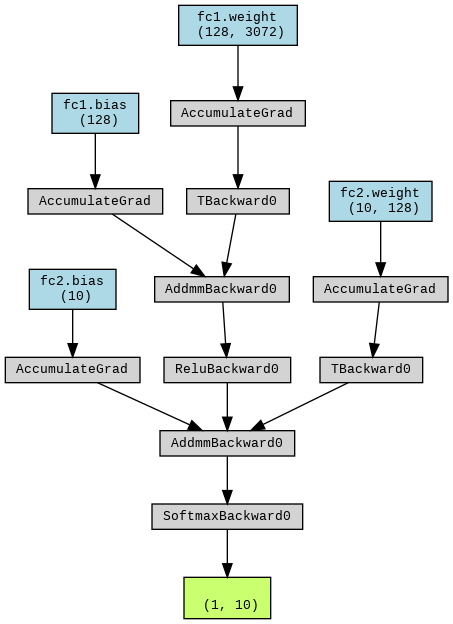

In [ ]:
from torchviz import make_dot
import torch
from IPython.display import Image, display

def visualize_model(model, input_size):
    dummy_input = torch.randn(*input_size)
    output = model(dummy_input)
    graph = make_dot(output, params=dict(model.named_parameters()))
    graph.render("temp_graph", format="png", cleanup=True)
    display(Image("temp_graph.png"))

# Visualize Fully Connected Neural Network
print("Visualizing Fully Connected Neural Network...")
fc_input_size = (1, 3072)  # Example input size for a fully connected network
model_fc = FullyConnectedNN(input_size=3072, hidden_size=128, output_size=10)
visualize_model(model_fc, fc_input_size)


Visualizing Convolutional Neural Network...


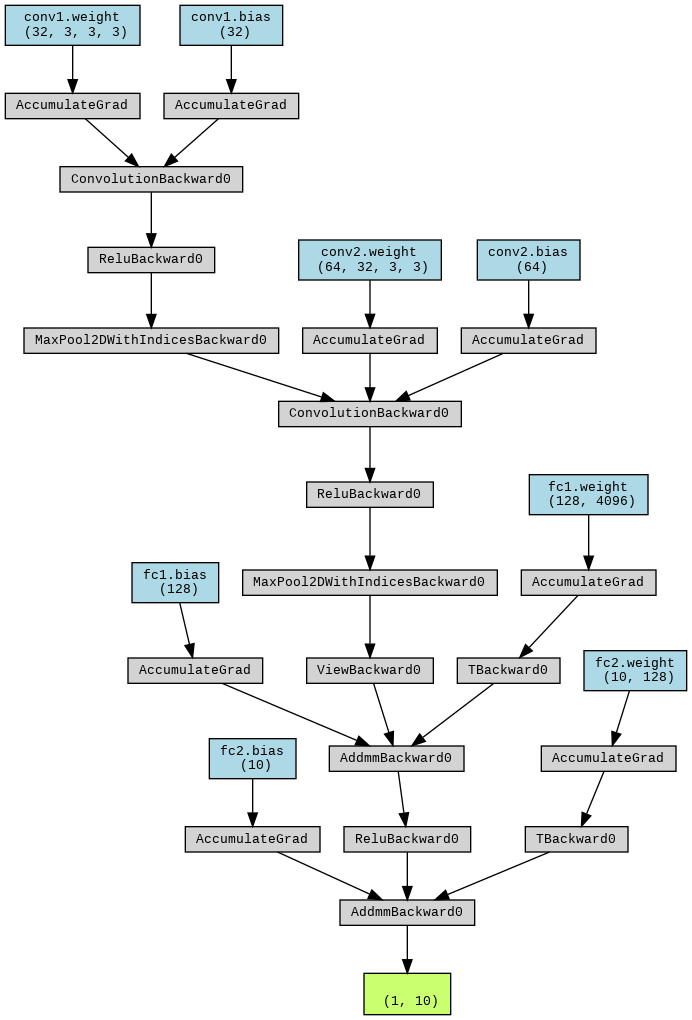

In [ ]:
# Visualize Convolutional Neural Network
print("\nVisualizing Convolutional Neural Network...")
cnn_input_size = (1, 3, 32, 32)
model_cnn = ConvolutionalNN()
visualize_model(model_cnn, cnn_input_size)

Training Fully Connected Neural Network...
Epoch 1/5, Loss: 2.3012
Epoch 2/5, Loss: 2.2800
Epoch 3/5, Loss: 2.2196
Epoch 4/5, Loss: 2.2975
Epoch 5/5, Loss: 2.3122
Fully Connected NN - Accuracy: 0.2587, F1 Score: 0.1678

Training Convolutional Neural Network...
Epoch 1/5, Loss: 2.1150
Epoch 2/5, Loss: 1.6921
Epoch 3/5, Loss: 1.7684
Epoch 4/5, Loss: 1.6643
Epoch 5/5, Loss: 1.5231
Convolutional NN - Accuracy: 0.4339, F1 Score: 0.4399


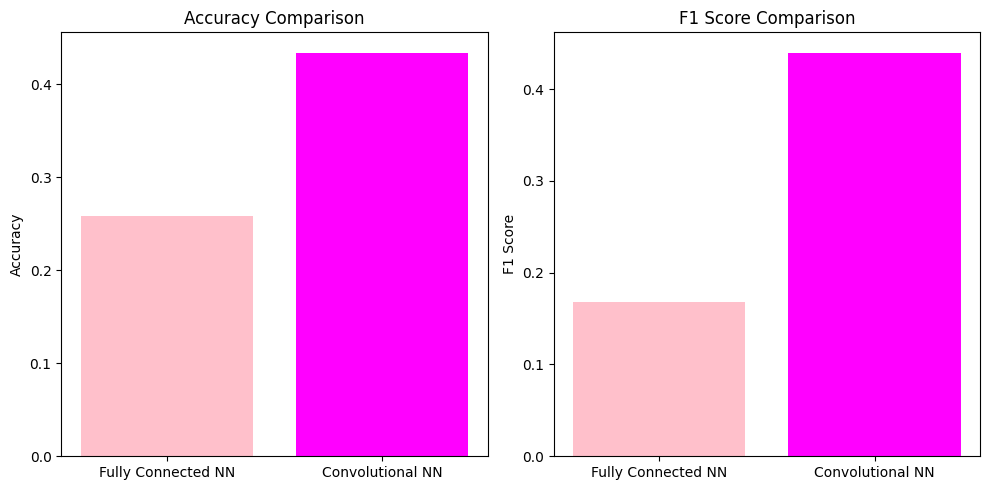

In [ ]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Define training function
def train_model(model, train_loader, test_loader, num_epochs=5, learning_rate=0.01):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    criterion = torch.nn.CrossEntropyLoss()  # Loss function

    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

# Define evaluation function
def evaluate_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average="weighted")
    return accuracy, f1

# Prepare DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Train and evaluate Fully Connected Neural Network
print("Training Fully Connected Neural Network...")
fc_model = FullyConnectedNN(input_size=3072, hidden_size=128, output_size=10)
train_model(fc_model, train_loader, test_loader)
fc_accuracy, fc_f1 = evaluate_model(fc_model, test_loader)
print(f"Fully Connected NN - Accuracy: {fc_accuracy:.4f}, F1 Score: {fc_f1:.4f}")

# Train and evaluate Convolutional Neural Network
print("\nTraining Convolutional Neural Network...")
cnn_model = ConvolutionalNN()
train_model(cnn_model, train_loader, test_loader)
cnn_accuracy, cnn_f1 = evaluate_model(cnn_model, test_loader)
print(f"Convolutional NN - Accuracy: {cnn_accuracy:.4f}, F1 Score: {cnn_f1:.4f}")

# Plot the results
labels = ['Fully Connected NN', 'Convolutional NN']
accuracy = [fc_accuracy, cnn_accuracy]
f1_scores = [fc_f1, cnn_f1]

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, accuracy, color=['pink', 'magenta'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

# Plot F1 score comparison
plt.subplot(1, 2, 2)
plt.bar(labels, f1_scores, color=['pink', 'magenta'])
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()


##Result


Comparison of the models here:

In [ ]:
print("\nDiscussion:")
if fc_accuracy > cnn_accuracy:
    print(f"The Fully Connected Neural Network (FCNN) achieved a higher accuracy ({fc_accuracy:.4f}) than the Convolutional Neural Network (CNN) ({cnn_accuracy:.4f}).")
else:
    print(f"The Convolutional Neural Network (CNN) achieved a higher accuracy ({cnn_accuracy:.4f}) than the Fully Connected Neural Network (FCNN) ({fc_accuracy:.4f}).")

if fc_f1 > cnn_f1:
    print(f"The Fully Connected Neural Network (FCNN) also achieved a higher F1 Score ({fc_f1:.4f}) than the CNN ({cnn_f1:.4f}).")
else:
    print(f"The Convolutional Neural Network (CNN) achieved a higher F1 Score ({cnn_f1:.4f}) than the Fully Connected Neural Network (FCNN) ({fc_f1:.4f}).")



Discussion:
The Convolutional Neural Network (CNN) achieved a higher accuracy (0.4339) than the Fully Connected Neural Network (FCNN) (0.2587).
The Convolutional Neural Network (CNN) achieved a higher F1 Score (0.4399) than the Fully Connected Neural Network (FCNN) (0.1678).
